In [210]:
# 1. Dựa vào bộ dữ liệu đã chọn, hãy xây dựng 1 mô hình classification tương ứng. Các
# bạn có thể dùng sklearn, hoặc các thư viện Machine Learning khác, ví dụ XGBoost.

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

data = pd.read_csv("yelp_review_polarity.csv")


In [ ]:
# run with subset of data for faster processing
train_data = data[data["split"] == "train"][:10000]
test_data = data[data["split"] == "test"][:1000]

x_train = train_data["text"]
y_train = train_data["label"]
x_test = test_data["text"]
y_test = test_data["label"]
print(x_train.shape, x_test.shape)
type(x_train)

(10000,) (1000,)


In [ ]:
x_train
type(x_train)

pandas.core.series.Series

In [216]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), min_df=0.01, max_df=0.99)
# x_train = vectorizer.fit_transform(x_train.tolist())
x_train = vectorizer.fit_transform(x_train)
# x_test = vectorizer.transform(x_test.tolist())
x_test = vectorizer.transform(x_test)
print(vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))

print("-"*20)
print(x_train[:100])
print(x_train.shape)
print(x_train.ndim)
print(type(x_train))


{'going': 344, '10': 1, 'years': 971, 'think': 864, 'started': 813, 'great': 353, 'really': 686, 'big': 76, 'options': 598, 'doesn': 221, 'right': 712, 'kept': 431, 'life': 450, 'don': 225, 'know': 436, 'like': 452, 'moving': 533, 'let': 447, 'tell': 855, 'stay': 815, 'away': 51, 'office': 582, 'left': 446, 'took': 876, 'pay': 625, 'having': 379, 'come': 151, 'month': 528, 'trying': 889, 'days': 195, 'guy': 366, 'make': 492, 'worse': 962, 'staff': 805, 'time': 867, 'll': 463, 'husband': 406, 'decided': 198, 'leave': 444, 'entire': 252, 'attitude': 46, 'doing': 223, 'better': 75, 'need': 544, 'felt': 288, 'write': 967, 'bad': 55, 'review': 707, 'met': 515, 'money': 527, 'don know': 226, 'multiple': 534, 'people': 627, 'called': 106, 'sure': 836, 'work': 957, 'recommended': 695, 'knew': 435, 'told': 872, 'got': 349, 'later': 443, 'received': 691, '00': 0, 'cash': 113, 'believe': 73, 'wouldn': 965, 'wasn': 932, 'help': 384, 'addition': 22, 'said': 722, 'situation': 778, 'make sure': 493, 

In [217]:
# model = Pipeline(steps=[
#     ('preprocessor', TfidfVectorizer(stop_words='english', ngram_range=(1, 2), min_df=0.01, max_df=0.99)),
#     ("classifier", RandomForestClassifier(random_state=100))
# ])
# model = RandomForestClassifier(n_estimators=50, criterion="gini", random_state=100)
# model = SVC(random_state=100)
model = LogisticRegression(random_state=100)
model.fit(x_train, y_train)

LogisticRegression(random_state=100)

In [219]:
y_predict = model.predict(x_test)
print("LogisticRegression: \n", classification_report(y_test, y_predict)) 

LogisticRegression: 
               precision    recall  f1-score   support

           1       0.87      0.90      0.89       519
           2       0.89      0.86      0.87       481

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



In [ ]:
# (Optional) Hãy thử trực quan hóa bộ dữ liệu mà các bạn đã chọn trong không gian
# 2/3 chiều mà không sử dụng label của dữ liệu. Các bạn có thể làm theo các bước
# sau:
# ● Đọc dữ liệu
# ● Biến đổi dữ liệu thành vector (word2vec, tfidf, làm phẳng ảnh, ….)
# ● Giảm chiều dữ liệu với PCA hoặc t-SNE
# ● Trực quan hóa

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
print(x_train)
print(x_train.shape)
print(x_train.ndim)
print(type(x_train))

--------------------
[[-0.028594    0.07167844]
 [-0.18035364 -0.03116314]
 [-0.19676036  0.00219874]
 ...
 [-0.00620787 -0.10805147]
 [ 0.05832559  0.03255116]
 [ 0.05769316 -0.03848188]]
(10000, 2)
2
<class 'numpy.ndarray'>


In [221]:
print(x_train[:5])
print(x_train[:5,0])

[[-0.028594    0.07167844]
 [-0.18035364 -0.03116314]
 [-0.19676036  0.00219874]
 [ 0.11984075  0.1330616 ]
 [ 0.12944012 -0.0729976 ]]
[-0.028594   -0.18035364 -0.19676036  0.11984075  0.12944012]


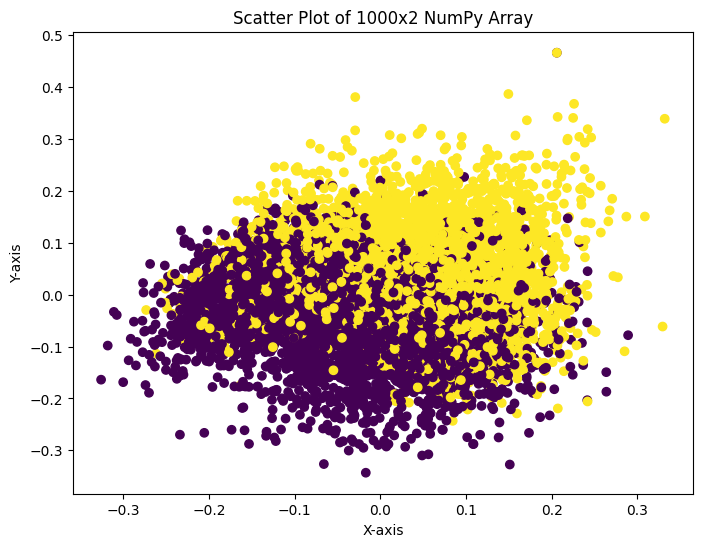

In [ ]:
# Create the scatter plot
plt.figure(figsize=(8, 6))  # Optional: Set figure size
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis')
plt.title("Yelp Review Polarit")
plt.xlabel("x")
plt.ylabel("y")
plt.show()